In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=500)       # num_words = 등장빈도 상위 500개 단어만 사용

In [6]:
X_train

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [15]:
print(len(X_train[0]))
np.array(X_train[0])        # 2는 oov(out of vocab)


218


array([  1,  14,  22,  16,  43,   2,   2,   2,   2,  65, 458,   2,  66,
         2,   4, 173,  36, 256,   5,  25, 100,  43,   2, 112,  50,   2,
         2,   9,  35, 480, 284,   5, 150,   4, 172, 112, 167,   2, 336,
       385,  39,   4, 172,   2,   2,  17,   2,  38,  13, 447,   4, 192,
        50,  16,   6, 147,   2,  19,  14,  22,   4,   2,   2, 469,   4,
        22,  71,  87,  12,  16,  43,   2,  38,  76,  15,  13,   2,   4,
        22,  17,   2,  17,  12,  16,   2,  18,   2,   5,  62, 386,  12,
         8, 316,   8, 106,   5,   4,   2,   2,  16, 480,  66,   2,  33,
         4, 130,  12,  16,  38,   2,   5,  25, 124,  51,  36, 135,  48,
        25,   2,  33,   6,  22,  12, 215,  28,  77,  52,   5,  14, 407,
        16,  82,   2,   8,   4, 107, 117,   2,  15, 256,   4,   2,   7,
         2,   5,   2,  36,  71,  43,   2, 476,  26, 400, 317,  46,   7,
         4,   2,   2,  13, 104,  88,   4, 381,  15, 297,  98,  32,   2,
        56,  26, 141,   6, 194,   2,  18,   4, 226,  22,  21, 13

In [17]:
review_len = [len(x) for x in X_train]
print(review_len)

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120, 121, 259, 180, 160, 114, 59, 343, 513

In [20]:
review_len = np.array(review_len)
review_len.min(), review_len.max()

(11, 2494)

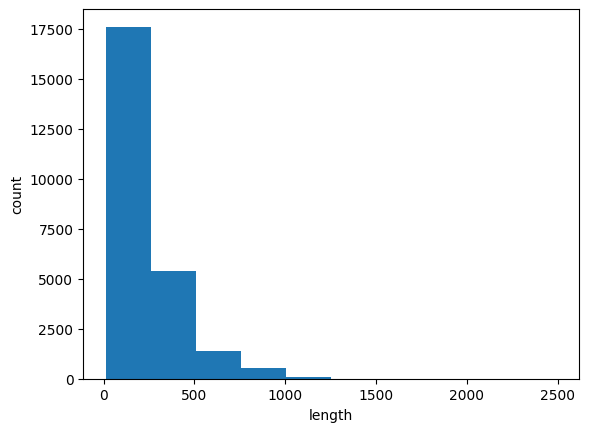

In [21]:
plt.hist(review_len)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [24]:
from keras.utils import pad_sequences

paded = pad_sequences(X_train, maxlen=200)
paded.shape

(25000, 200)

### Model

In [25]:
from keras import layers

model = keras.Sequential([
    layers.Embedding(500, 16, input_length=200),
    layers.LSTM(20, activation='tanh'),
    layers.Dense(1, activation='sigmoid')           # 0.5보다 크면 1, 작으면 0
])

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    paded, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
625/625 [==============================] - 18s 21ms/step - loss: 0.4963 - accuracy: 0.7503 - val_loss: 0.4234 - val_accuracy: 0.8106
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 0.4064 - accuracy: 0.8184 - val_loss: 0.4245 - val_accuracy: 0.8092
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3854 - accuracy: 0.8311 - val_loss: 0.3884 - val_accuracy: 0.8268
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3789 - accuracy: 0.8314 - val_loss: 0.3994 - val_accuracy: 0.8204
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3728 - accuracy: 0.8358 - val_loss: 0.3886 - val_accuracy: 0.8248
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3632 - accuracy: 0.8407 - val_loss: 0.3968 - val_accuracy: 0.8246
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3608 - accuracy: 0.8388 - val_loss: 0.3837 - val_accuracy: 0.826

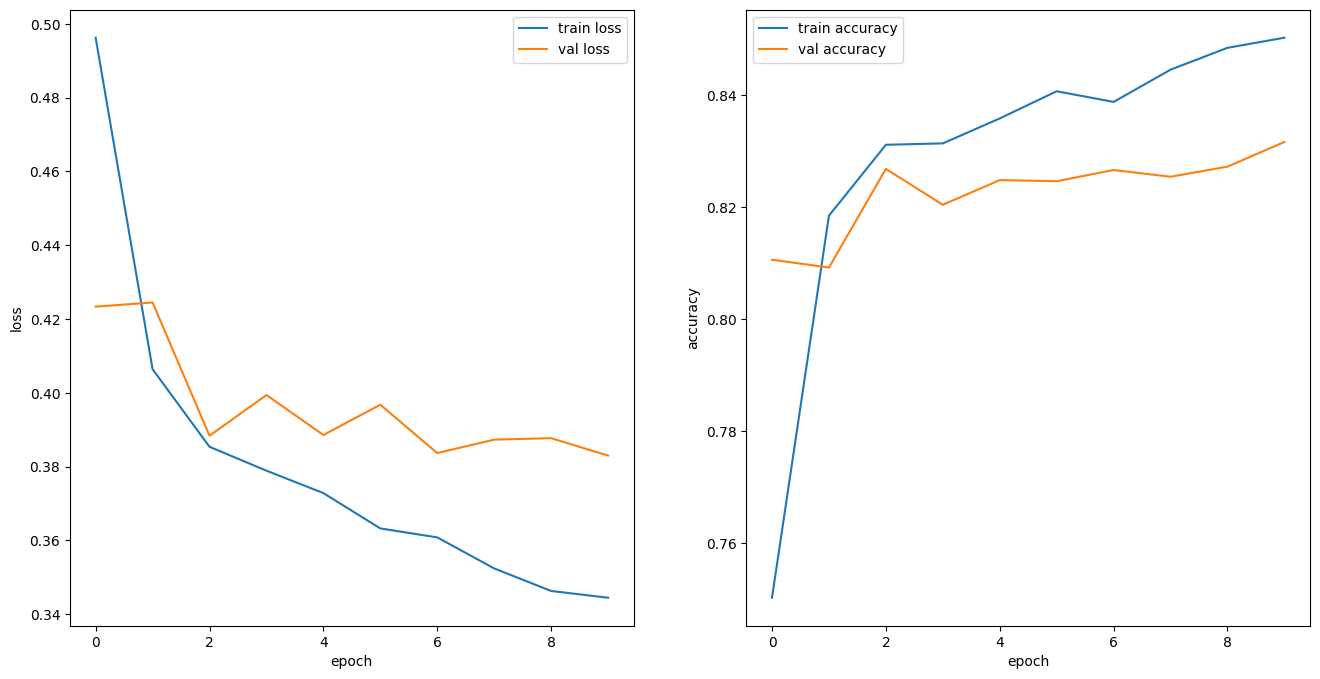

In [29]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

plot_history(history)

### Pred

In [31]:
X_test = pad_sequences(X_test, maxlen=200)
y_pred = model.predict(X_test)
y_pred

782/782 [==============================] - 5s 4ms/step


array([[0.29260612],
       [0.9014149 ],
       [0.34788746],
       ...,
       [0.0319817 ],
       [0.09891248],
       [0.3395786 ]], dtype=float32)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred > 0.5)

0.83912

In [53]:
sentence = "Whether a movie is a rotten tomato or a brilliant work of art, if people are watching it, it's worth critiquing. A decent movie review should entertain, persuade and inform, providing an original opinion without giving away too much of the plot. A great movie review can be a work of art in its own right. Read on to learn how to analyze a movie like a professional film critic, come up with an interesting thesis, and write a review as entertaining as your source material."
sentence = sentence.split()
word_to_index = imdb.get_word_index()

In [54]:
import re

sentence = re.sub('[^0-9a-zA-Z]', ' ', str(sentence))
print(sentence)

  Whether    a    movie    is    a    rotten    tomato    or    a    brilliant    work    of    art     if    people    are    watching    it     it s    worth    critiquing     A    decent    movie    review    should    entertain     persuade    and    inform     providing    an    original    opinion    without    giving    away    too    much    of    the    plot     A    great    movie    review    can    be    a    work    of    art    in    its    own    right     Read    on    to    learn    how    to    analyze    a    movie    like    a    professional    film    critic     come    up    with    an    interesting    thesis     and    write    a    review    as    entertaining    as    your    source    material   


In [55]:
encode = []

for word in sentence.split():
    try:
        if word_to_index[word] <= 500:
            encode.append(word_to_index[word] + 3)      # 0, 1, 2 : padding, start, oov
        else:
            encode.append(2)
            
    except:                                             # word_to_index에 없는 단어
        encode.append(2)

In [56]:
np.array(encode)

array([  2,   6,  20,   9,   6,   2,   2,  42,   6,   2, 157,   7, 498,
        48,  84,  26, 149,  12,  12,   2, 290,   2,   2,   2,  20,   2,
       144,   2,   2,   5,   2,   2,  35, 204,   2, 209,   2, 245,  99,
        76,   7,   4, 114,   2,  87,  20,   2,  70,  30,   6, 157,   7,
       498,  11,  94, 205, 208,   2,  23,   8,   2,  89,   8,   2,   6,
        20,  40,   6,   2,  22,   2, 216,  56,  19,  35, 221,   2,   5,
         2,   6,   2,  17, 441,  17, 129,   2,   2])

In [57]:
sentence_p = pad_sequences([encode], maxlen=200)
sentence_p

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   6,  20,   9,
          6,   2,   2,  42,   6,   2, 157,   7, 498,  48,  84,  26, 149,
         12,  12,   2, 290,   2,   2,   2,  20,   2, 144,   2,   2,   5,
          2,   2,  35, 204,   2, 209,   2, 245,  99,  76,   7,   4, 114,
          2,  87,  20,   2,  70,  30,   6, 157,   7, 498,  11,  94, 205,
        208,   2,  23,   8,   2,  89,   8,   2,   6

In [58]:
model.predict(sentence_p)

1/1 [==============================] - 0s 81ms/step


array([[0.6977103]], dtype=float32)